# Concrete Strength Prediction Using Machine Learning

* **Author** - www.elastropy.com
* **Description** - Concrete Strength Prediction Using Machine Learning.
* **Support** - For any queries (or) suggestions (or) to report errors, please send email to elastropy@gmail.com

## Key Learnings

You will learn in detail about, 

1. various stages involved in developing ML model for the given data.
1. cost evaluation, gradient evaluation, learning rate selection, feature scaling.
1. how to save the developed ML model and use it for future predictions.

## Queries

If you have any queries or suggestions, please post them in either of the following two platforms,

1. Course Discussion Forum
1. Email to - elastropy@gmail.com

# Machine Learning Regression Overview for Concrete Strength Prediction
1. Data import and cleaning (if required)
1. Train-Test split.
1. ML Model Development
    1. Feature scaling
    1. Regression configuration (such as setting initial weights, biases, number of iterations, learning rate)
    1. Gradient Decent Loop (i = 1:numIter)
        1. Gadient evaluation
        1. Update weights and bias
        1. Cost evaluation
1. Testing the trained ML model 
1. Saving ML model parameters
1. Prediction using the saved ML parameters

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from utilities import *

# Data Import and Organisation

**Website** - https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

**Data Direct Link** - https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/

In [2]:
df = pd.read_excel(r'Concrete_Data.xls', sheet_name='Sheet1')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


Converting the dataframe to numpy arrays of features and targets

In [3]:
data = df.to_numpy()
x = data[:,0:8]     # Input features
y = data[:,8]       # Target 

# ML Model Building and Training

## Train-Test-Split

In [4]:
nrows = x.shape[0]

train_percent = 0.8 # Using 80% data for training and 20% data for testing

nrows_train = int(nrows*train_percent)

x_train = x[:nrows_train, :]
y_train = y[:nrows_train]

x_test = x[nrows_train:, :]
y_test = y[nrows_train:]

## Feature scaling

In [5]:
X_normal, X_mean, X_std = normalize_features(x_train)

print('Mean = ', X_mean)
print('Standard Deviation = ', X_std)
print('Normalised Input Features = ', X_normal)

Mean =  [294.87936893  65.84338592  46.41717233 180.09399272   5.52573422
 987.11304612 777.55989078  50.13349515]
Standard Deviation =  [104.36231521  85.46642242  61.1284746   21.94621923   6.24190439
  73.33222359  82.85179435  69.87100906]
Normalised Input Features =  [[ 2.34874658 -0.77040063 -0.75933798 ...  0.72119665 -1.22580195
  -0.31677652]
 [ 2.34874658 -0.77040063 -0.75933798 ...  0.9257452  -1.22580195
  -0.31677652]
 [ 0.36048099  0.89692082 -0.75933798 ... -0.75155291 -2.21552101
   3.14674867]
 ...
 [ 0.25986996 -0.77040063 -0.75933798 ... -0.17881697  0.27084639
  -0.51714575]
 [ 0.25986996 -0.77040063 -0.75933798 ... -0.17881697  0.27084639
  -0.31677652]
 [ 0.25986996 -0.77040063 -0.75933798 ... -0.17881697  0.27084639
   1.85866079]]


## ML Configuration

In [6]:
# Initialise weights and bias
w_init = np.zeros(X_normal.shape[1])+0.1
b_init = 0 + 0.1

w_final = w_init
b_final = b_init

# --- iteration and learning rate definition
numIter = 1000   # number of interations
LR = 1.e-1        # Learning rate

# --- Srating cost value for intial weights and bias
cost = eval_cost(X_normal, y_train, w_final, b_final)
print('Staring vlaues ======= \n',
      'Intial Cost = ', cost, '\n',
      'Weights = ', w_final, '\n',
      'bias = ', b_final)

Staring vlaues ======= 
 Intial Cost =  817.1788820174996 
 Weights =  [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1] 
 bias =  0.1


In [7]:
m = X_normal.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_normal[i], w_final) + b_final
    
print('yp = ', yp[1:20])

yp =  [-0.01070404  0.29753565  0.43350048  0.46487482  0.03458138  0.42343761
 -0.05887974 -0.05415356 -0.07900548  0.07844845 -0.01028649  0.27740991
  0.05068197 -0.06220386  0.0104305   0.18310564  0.4120632   0.0298552
  0.13853825]


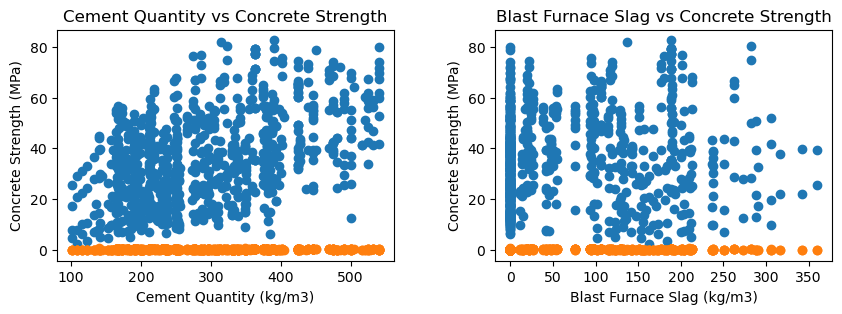

In [8]:
# create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Cement Quantity vs Concrete Strength
axes[0].scatter(x_train[:,0], y_train)
axes[0].scatter(x_train[:,0], yp)
axes[0].set_xlabel('Cement Quantity (kg/m3)')
axes[0].set_ylabel('Concrete Strength (MPa)')
axes[0].set_title('Cement Quantity vs Concrete Strength')

# Blast Furnace Slag vs Concrete Strength
axes[1].scatter(x_train[:,1], y_train)
axes[1].scatter(x_train[:,1], yp)
axes[1].set_xlabel('Blast Furnace Slag (kg/m3)')
axes[1].set_ylabel('Concrete Strength (MPa)')
axes[1].set_title('Blast Furnace Slag vs Concrete Strength')

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.3)

# display plot
plt.show()

## Main ML Gradient Descent Loop

In [9]:
for i in range(numIter):
    dJ_dw, dJ_db = eval_gradient(X_normal, y_train, w_final, b_final)
    w_final = w_final - LR*dJ_dw
    b_final = b_final - LR*dJ_db
    cost = eval_cost(X_normal, y_train, w_final, b_final)

In [10]:
print('Final vlaues ======= \n',
      'Final Cost = ', cost, '\n',
      'Weights = ', w_final, '\n',
      'bias = ', b_final)

Final vlaues ======= 
 Final Cost =  58.73925017842085 
 Weights =  [10.47565487  7.15945691  4.71413574 -4.19218994  2.5648534   0.79619788
 -0.06992159  8.09594071] 
 bias =  36.557486959792456


## Training Predictions

In [11]:
m = X_normal.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_normal[i], w_final) + b_final

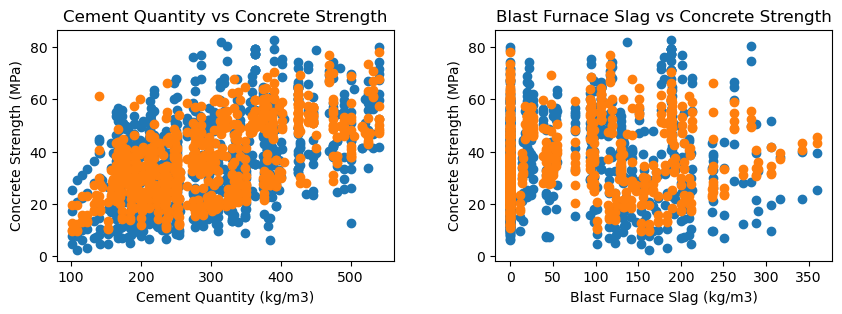

In [12]:
# create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Cement Quantity vs Concrete Strength
axes[0].scatter(x_train[:,0], y_train)
axes[0].scatter(x_train[:,0], yp)
axes[0].set_xlabel('Cement Quantity (kg/m3)')
axes[0].set_ylabel('Concrete Strength (MPa)')
axes[0].set_title('Cement Quantity vs Concrete Strength')

# Blast Furnace Slag vs Concrete Strength
axes[1].scatter(x_train[:,1], y_train)
axes[1].scatter(x_train[:,1], yp)
axes[1].set_xlabel('Blast Furnace Slag (kg/m3)')
axes[1].set_ylabel('Concrete Strength (MPa)')
axes[1].set_title('Blast Furnace Slag vs Concrete Strength')

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.3)

# display plot
plt.show()

## Model Testing

In [13]:
x_test_norm = (x_test - X_mean) / X_std   # This is a numpy broadcasting operation
y_test_predict = np.dot(x_test_norm, w_final) + b_final

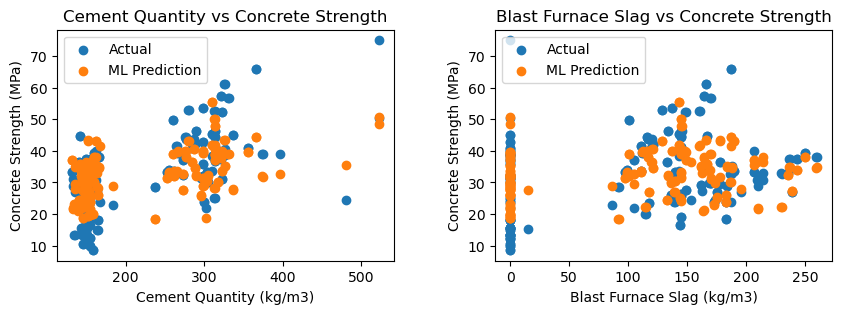

In [14]:
# create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Cement Quantity vs Concrete Strength
axes[0].scatter(x_test[:,0], y_test, label='Actual')
axes[0].scatter(x_test[:,0], y_test_predict, label='ML Prediction')
axes[0].set_xlabel('Cement Quantity (kg/m3)')
axes[0].set_ylabel('Concrete Strength (MPa)')
axes[0].set_title('Cement Quantity vs Concrete Strength')
axes[0].legend()

# Blast Furnace Slag vs Concrete Strength
axes[1].scatter(x_test[:,1], y_test, label='Actual')
axes[1].scatter(x_test[:,1], y_test_predict, label='ML Prediction')
axes[1].set_xlabel('Blast Furnace Slag (kg/m3)')
axes[1].set_ylabel('Concrete Strength (MPa)')
axes[1].set_title('Blast Furnace Slag vs Concrete Strength')
axes[1].legend()

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.3)

# display plot
plt.show()

## Let's plot all features against target

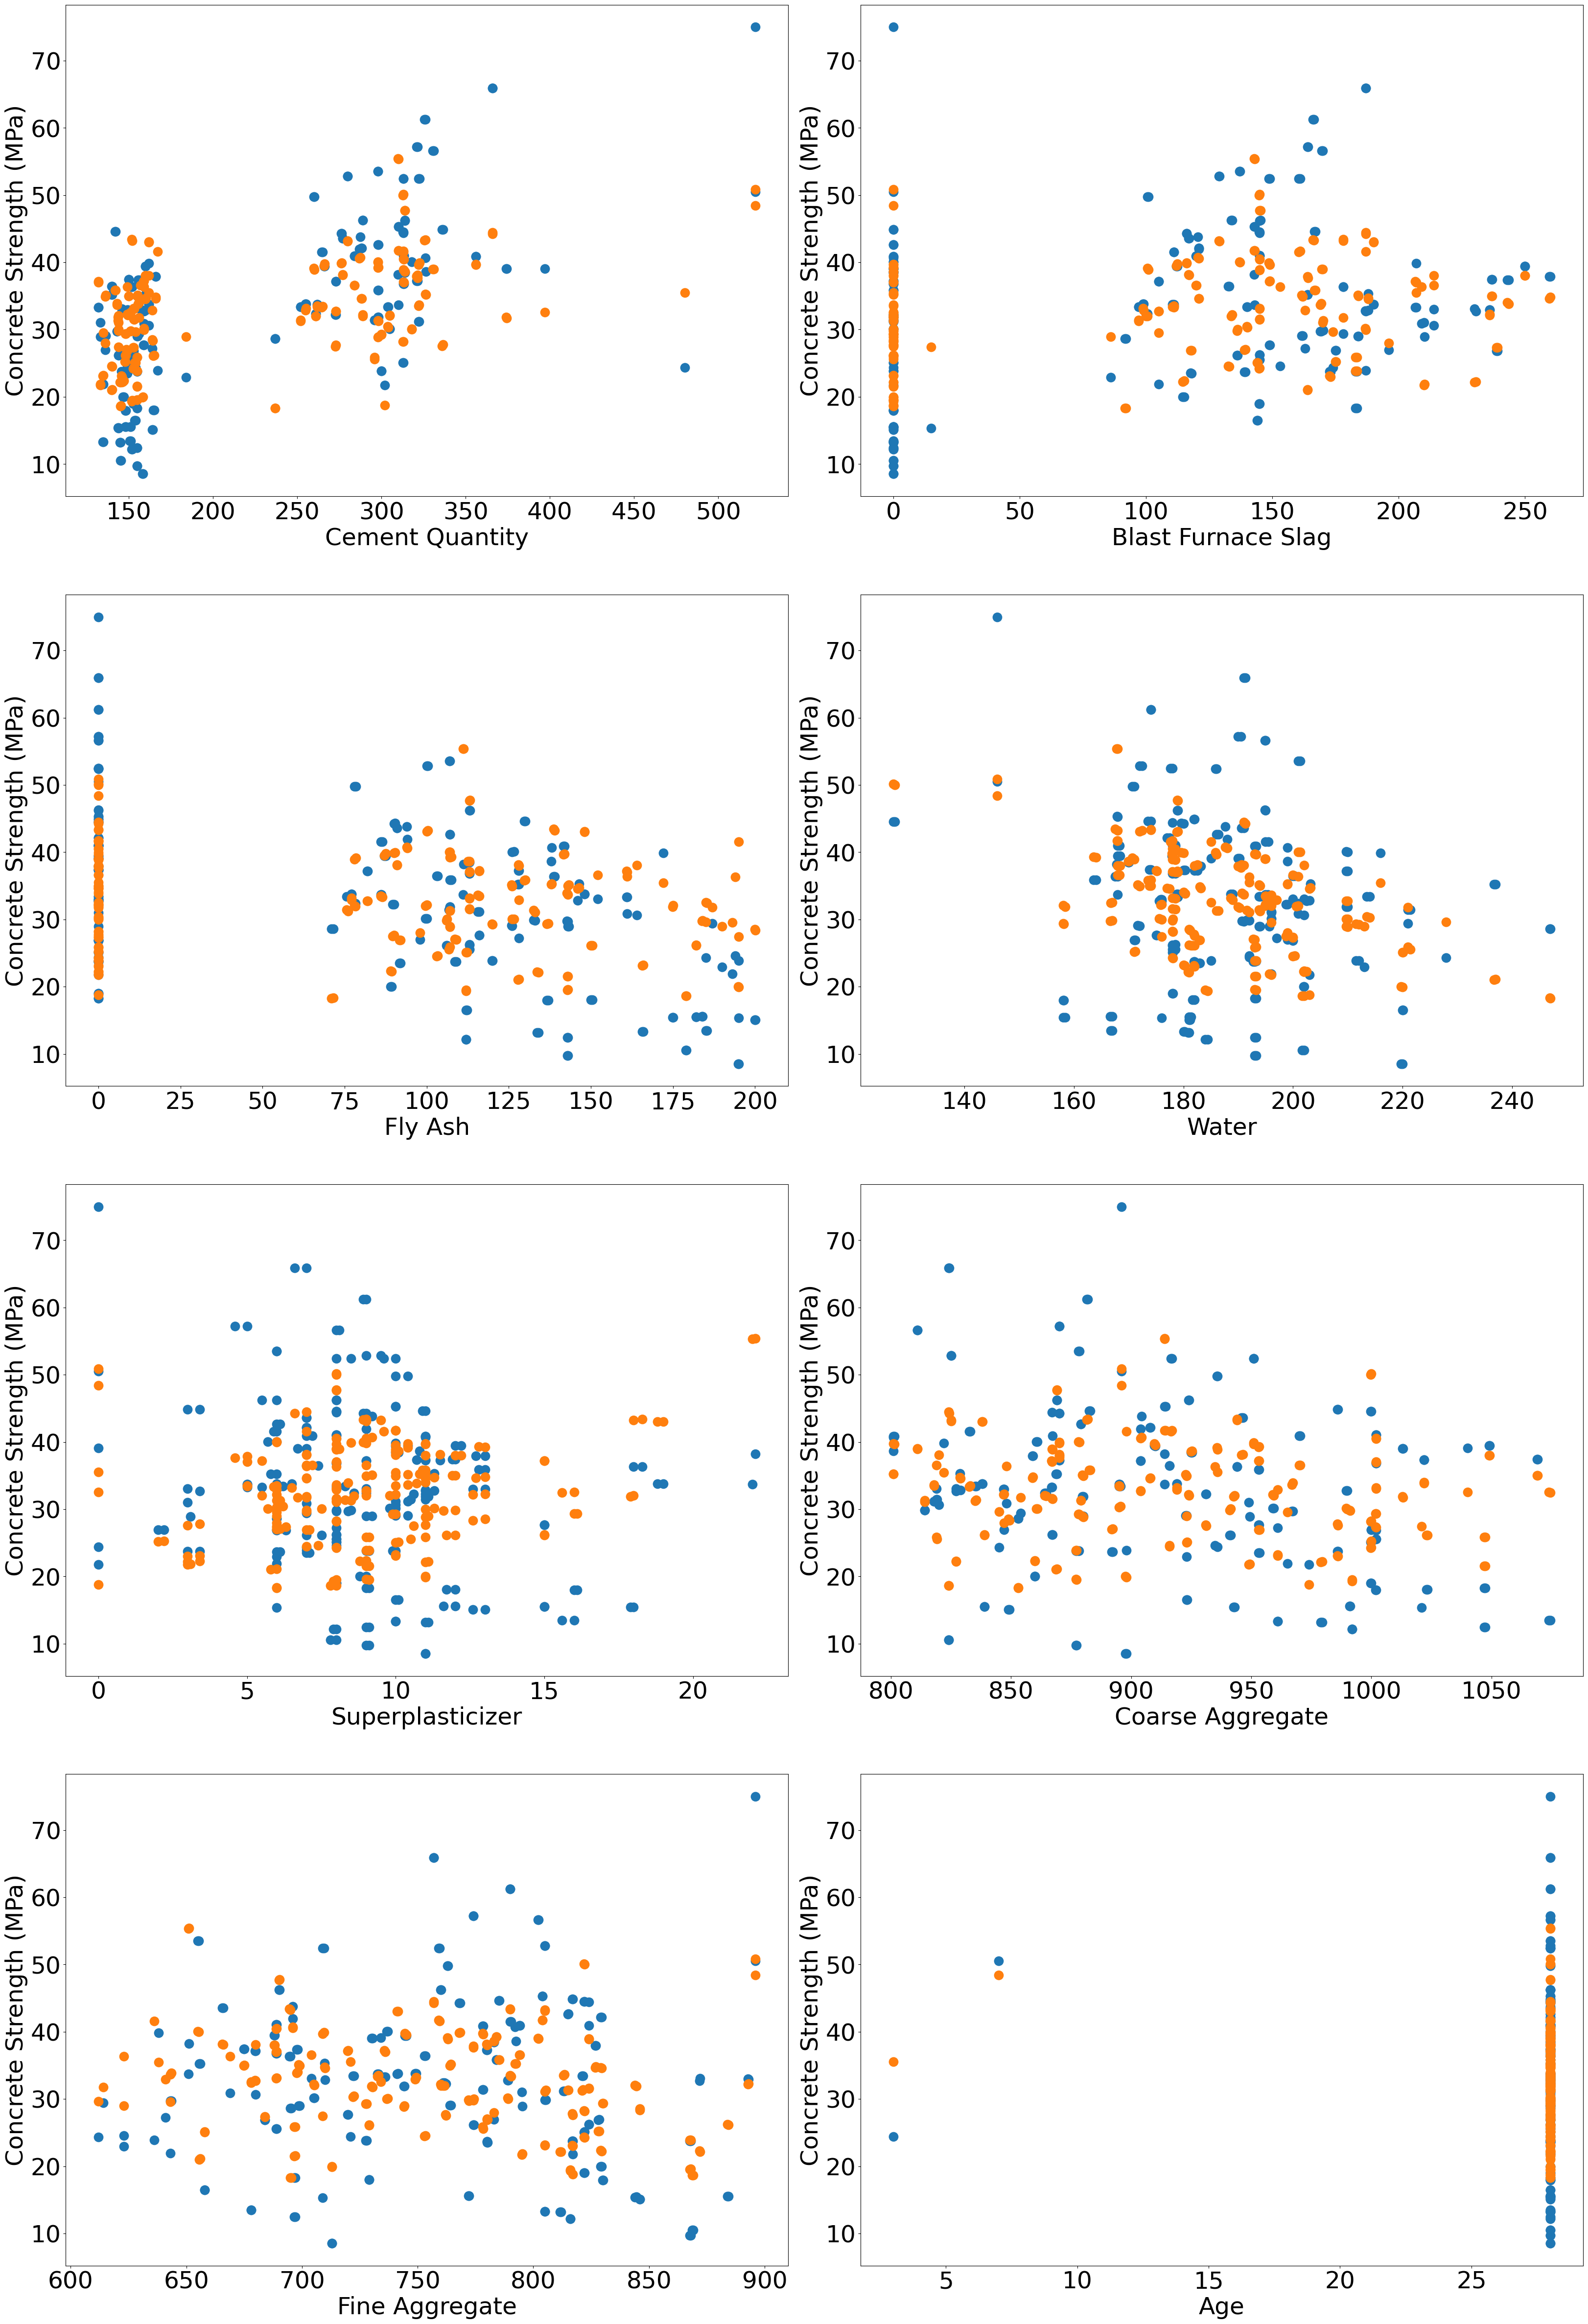

In [15]:
plt.rcParams.update({'font.size': 35})  # Update font sizes of all subplots in one go
fig, axes = plt.subplots(4, 2, figsize=(40, 60))

feature_title = ['Cement Quantity',
                 'Blast Furnace Slag',
                 'Fly Ash',
                 'Water',
                 'Superplasticizer',
                 'Coarse Aggregate',
                 'Fine Aggregate',
                 'Age']

for row in range(0, axes.shape[0]):
    for col in range(0, axes.shape[1]):
        feature_id = row*axes.shape[1]+col
        axes[row,col].scatter(x_test[:,feature_id], y_test, s=175)
        axes[row,col].scatter(x_test[:,feature_id], y_test_predict, s=175)
        axes[row,col].set_xlabel(feature_title[feature_id])
        axes[row,col].set_ylabel('Concrete Strength (MPa)')
        

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.1)

# display plot
plt.show()

## Saving the ML model data for future predictions

In [16]:
pred_guidelines = """
x_norm = (x_input - feature_mean) / feature_std   # This is a numpy broadcasting operation
y_predict = np.dot(x_norm, weights_norm) + bias_norm

feature_title = ['Cement Quantity',      # Kg/m3
                 'Blast Furnace Slag',   # Kg/m3
                 'Fly Ash',              # Kg/m3
                 'Water',                # Kg/m3
                 'Superplasticizer',     # Kg/m3
                 'Coarse Aggregate',     # Kg/m3
                 'Fine Aggregate',       # Kg/m3
                 'Age']                  # days
                 
Only one output is expected, that is concrete strength in MPa
"""

In [17]:
np.savez('concrete_strength_ml_data.npz', weights_norm=w_final, 
                                          bias_norm=b_final, 
                                          feature_mean=X_mean,
                                          feature_std=X_std,
                                          pred_guidelines=pred_guidelines)

# Next Predicting the Concrete Strength using Saved ML Data

# References

1. Ng, A. Machine Learning. Coursera. Retrieved April 29, 2023, from https://www.coursera.org/learn/machine-learning
1. Serrano, L. (2021). Grokking Machine Learning. Simon and Schuster.
1. Deisenroth, M., Faisal, A., & Ong, C. (2020). Mathematics for Machine Learning. Cambridge: Cambridge University Press. doi:10.1017/9781108679930
